In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
sns_colors = sns.color_palette()
sns_colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## What is Multivariate Exploration of Data?
A multivariate visualization is the visualiziation of three or more variables

### Lesson Overview
In this lesson we will be covering the following topics:

1. Non-Positional Encodings
2. Color Palettes
3. Faceting in Two Directions
4. Adaptations of Bivariate Plots
5. Plot Matrices
6. Feature Engineering

### Non-Positional Encodings

The type of encoding that will be most useful for the additional variable will depend on whether it is quantitative or qualitative.

1. **Shape**: Shape is ideal for __categorical__ variables and since there's no natural order of shapes, it is best for __nominal__ type data.
2. **Size**: Is an encoding that's often used for __numerical__ data. When using size, be careful to associate area with values and not radius with values as this leads to a misrepresentation of values
3. **Color**: Color can be used for both qualitative and quantitative variables

In [3]:
fuel_econ = pd.read_csv('datasets/fuel-econ.csv')
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


In [4]:
fuel_econ.trans.unique()

array(['Automatic (AM6)', 'Automatic (AM-S6)', 'Automatic (S6)',
       'Automatic 8-spd', 'Manual 6-spd', 'Automatic 6-spd',
       'Automatic (S5)', 'Automatic 7-spd', 'Automatic (AV-S6)',
       'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S7)', 'Automatic (variable gear ratios)',
       'Manual 5-spd', 'Automatic (AV-S8)', 'Automatic 4-spd',
       'Automatic 5-spd', 'Automatic (AM7)', 'Automatic (AV-S7)',
       'Automatic 9-spd', 'Automatic (AM-S8)', 'Automatic (A1)',
       'Automatic (AM8)', 'Automatic (S9)', 'Automatic (S10)',
       'Automatic (AV-S10)'], dtype=object)

Let's clean the trans column to only have either Automatic or Manual values...

In [6]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [7]:
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic


In [8]:
fuel_econ.trans_type.unique()

array(['Automatic', 'Manual'], dtype=object)

Reading in the second dataset...

In [9]:
pokemon = pd.read_csv('datasets/pokemon.csv')
pokemon.head(3)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100


**Using Shape or Size to encode a 3rd variable in a scatter plot**

In [13]:
fuel_econ.shape

(3929, 21)

In [14]:
# taking a random sample of only 200 observations to avoid overplotting

np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

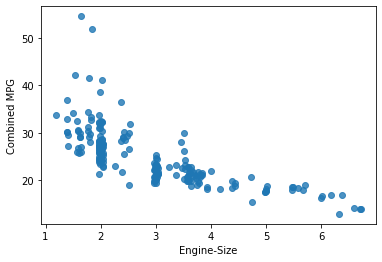

In [17]:
sns.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False)
plt.xlabel('Engine-Size')
plt.ylabel('Combined MPG');

So we're trying to use visualization to find out if there are differences between cars with automatic transmission and manual transmission in terms of fuel-efficiency and engine-size?

Since transmission type is categorical, shape is the right encoding to use.

In [18]:
ttype_markers = [['Automatic','o'],  # automatic types take circular shape o
                ['Manual','^']]  # manual types take triangular shape caret ^

In [19]:
for name, shape in ttype_markers:
    print(name, shape)
    break

Automatic o


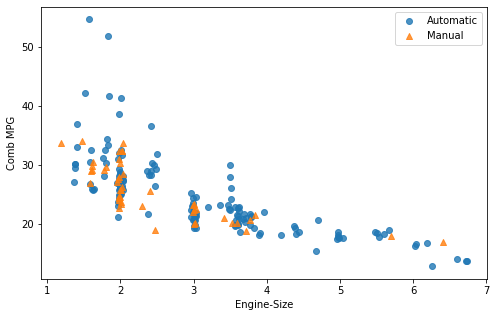

In [20]:
plt.figure(figsize=(8,5))

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type']==ttype]
    sns.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker=marker)
    
plt.xlabel('Engine-Size')
plt.ylabel('Comb MPG')
plt.legend(['Automatic', 'Manual']);

In [21]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


Instead of transmission type, what if we want to add carbon-dioxide emissions as a third variable?

Since CO2 is numeric, one good encoding we can use is marker-size or size encoding. In matplotlib scatter plot, we can just set the size parameter to C02, `s=CO2`. But since we're using regplot we set it as a `scatter_kws` dictionary to the entire column


In [22]:
color = sns_colors[3]

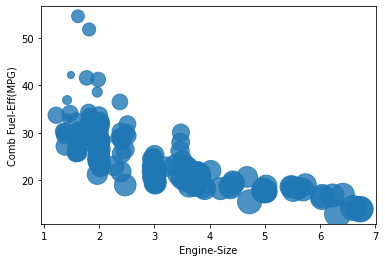

In [24]:
sns.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False,
           scatter_kws={'s': fuel_econ_subset['co2']})

plt.xlabel('Engine-Size')
plt.ylabel('Comb Fuel-Eff(MPG)');

Let's reduce the size of the bubbles and add some transparency

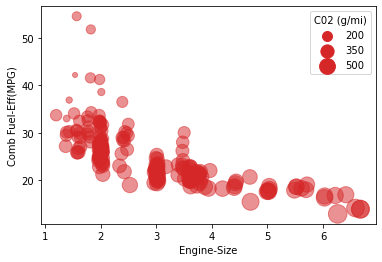

In [25]:
sns.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False,
           color=color, scatter_kws={'s': fuel_econ_subset['co2']/2, 'alpha':0.5})

plt.xlabel('Engine-Size')
plt.ylabel('Comb Fuel-Eff(MPG)')

sizes = [200, 350, 500]
legend_obj = []

for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s/2, color=color))
plt.legend(legend_obj, sizes, title='C02 (g/mi)');